In [103]:
# Dataset: Stack Overflow Annual Developer Survey 2022 by DHEEMANTH BHAT 
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/pc/OneDrive/Documents/Jupyter Projects/survey_results_public.csv")
pd.set_option('display.max_columns', None)
data

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

In [104]:
def dataframe_info(df):
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
dataframe_info(data)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
ResponseId,int64,73268,0,0.000000,73268
MainBranch,object,73268,0,0.000000,6
Employment,object,71709,1559,2.127805,103
RemoteWork,object,58958,14310,19.531037,3
CodingActivities,object,58899,14369,19.611563,63
...,...,...,...,...,...
TrueFalse_2,object,35715,37553,51.254299,2
TrueFalse_3,object,35749,37519,51.207894,2
SurveyLength,object,70444,2824,3.854343,3
SurveyEase,object,70508,2760,3.766992,3


In [105]:
print(data.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

## Things to do:
### 1. At what companies do developers get paid the most?
### 2. How much does remote working matter to employees?
### 3. How does coding experience affect the level of pay?
### 4. What's the most popular method of leaning to code?
### 5. Are you more likely to get a job as a developer if you have a master's degree?

## 1. At what companies do developers get paid the most?

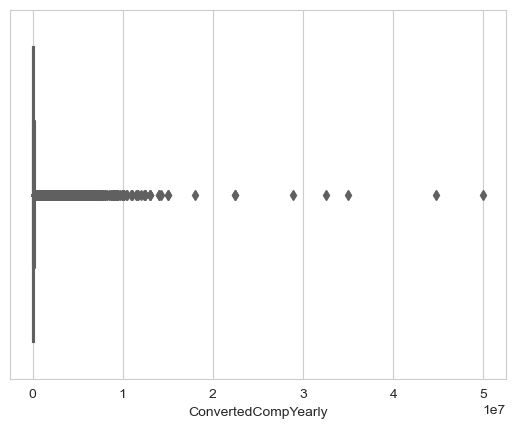

In [106]:
sns.set_style('whitegrid')
sns.set_palette('PuRd')
sns.boxplot(x='ConvertedCompYearly', data=data, palette='Blues')
plt.show()

#### These extreme outliers in yearly compensation our skewing the data, we'll remove them

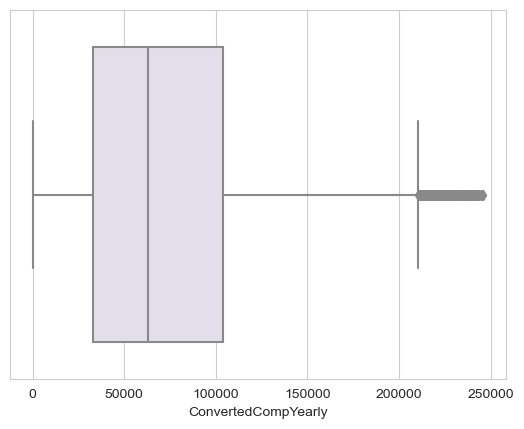

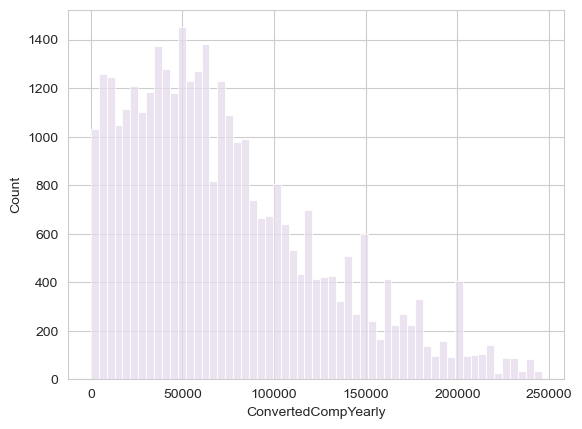

In [107]:
seventy_fifth = data['ConvertedCompYearly'].quantile(0.75)

twenty_fifth = data['ConvertedCompYearly'].quantile(0.25)

iqr = seventy_fifth - twenty_fifth

upper = seventy_fifth + (1.5*iqr)

lower = twenty_fifth - (1.5*iqr)

outliers_removed = data[(data['ConvertedCompYearly'] > lower) & (data['ConvertedCompYearly'] < upper)]

sns.boxplot(x='ConvertedCompYearly', data=outliers_removed)
plt.show()
sns.histplot(x='ConvertedCompYearly', data=outliers_removed)
plt.show()

#### Now we can better visualize the data...

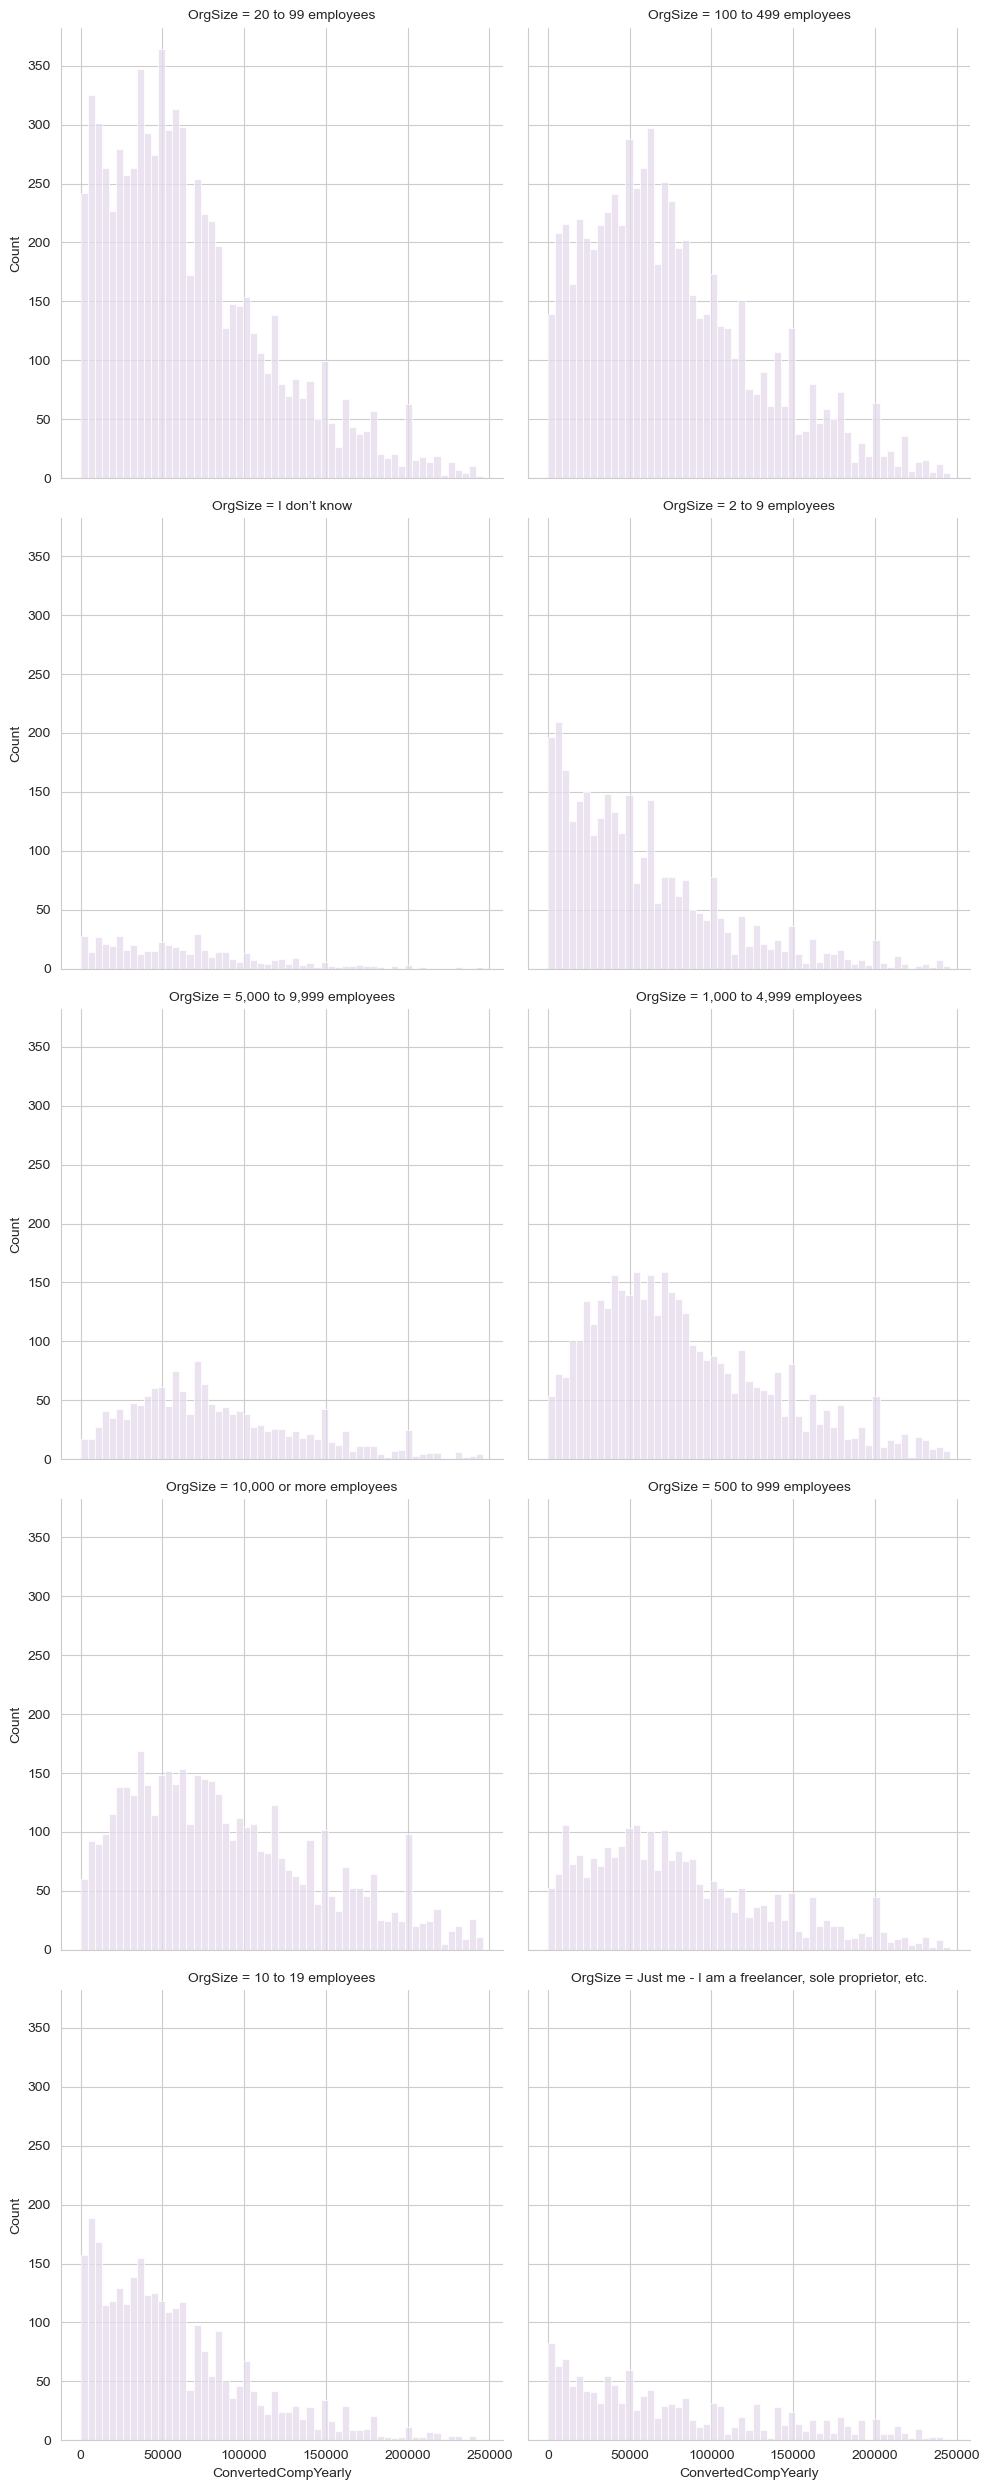

In [108]:
sns.displot(x = 'ConvertedCompYearly', data=outliers_removed, col='OrgSize', col_wrap = 2)
plt.show()

#### The histograms of the yearly compensation for each organization size all appear to be right skewed, to get a better representation of the data, we'll use the median as a summary statistic in lieu of the mean

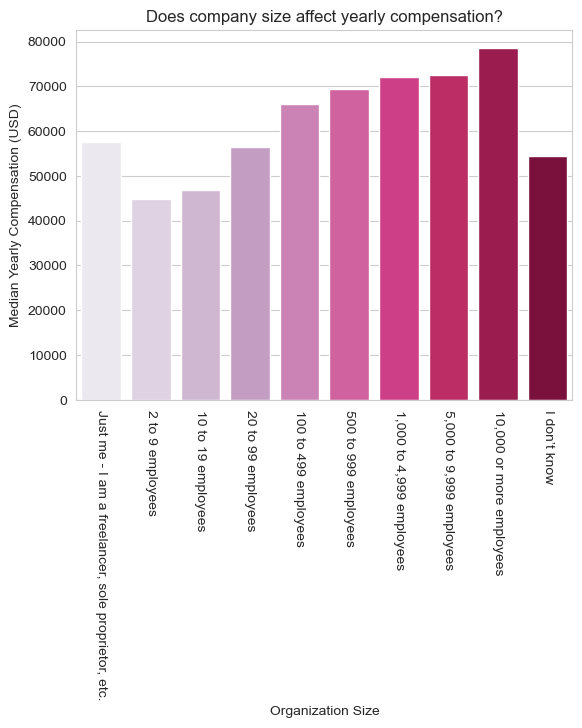

In [109]:
order = ['Just me - I am a freelancer, sole proprietor, etc.', '2 to 9 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees', 'I don’t know']
sns.barplot(x='OrgSize', y='ConvertedCompYearly', data = outliers_removed, order = order, ci=None, estimator = 'median', palette='PuRd')
plt.title('Does company size affect yearly compensation?')
plt.xlabel('Organization Size')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=270)

plt.show()

#### As a generaly trend, developers that work at a larger company are more likely to be paid more.

## 2. How much does remote work matter to employees?

In [110]:
print(outliers_removed['RemoteWork'].unique())

['Hybrid (some remote, some in-person)' 'Fully remote' 'Full in-person'
 nan]


['Hybrid' 'Fully remote' 'Full in-person' nan]


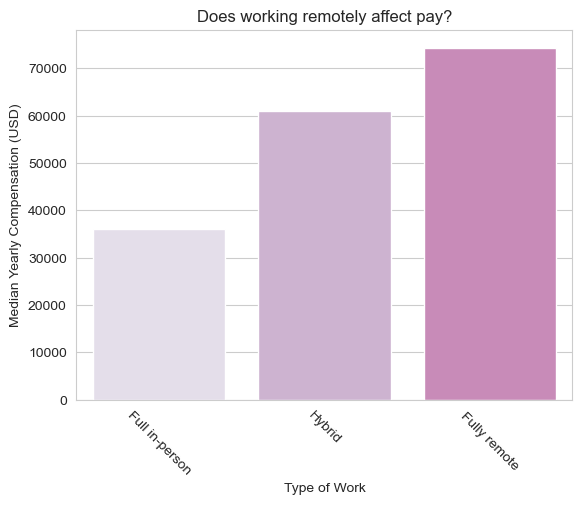

In [111]:
outliers_removed.loc[outliers_removed['RemoteWork'] == 'Hybrid (some remote, some in-person)', 'RemoteWork'] = 'Hybrid'
print(outliers_removed['RemoteWork'].unique())
order = ['Full in-person', 'Hybrid', 'Fully remote']
sns.barplot(x = 'RemoteWork', y = 'ConvertedCompYearly', data=outliers_removed, order = order, ci=None, estimator='median')
plt.title('Does working remotely affect pay?')
plt.xlabel('Type of Work')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=315)
plt.show()

#### Based on the 2022 Stack Overflow survey, indivdiuals that work fully remote are more likely to have a higher yearly compensation

## 3. How does coding experience affect the level of pay?

In [112]:
outliers_removed['YearsCode'].unique()

array(['14', '20', '6', '5', '12', '11', '7', '13', '36', '25', '16',
       '10', '24', '3', '4', '40', '15', '9', '8', '17', '18', '29', '30',
       '22', '32', '27', '26', nan, '45', '28', '19', '23', '43', '48',
       '38', '21', 'Less than 1 year', '37', '31', '35', '39', '1', '2',
       '42', '34', '46', '33', '41', 'More than 50 years', '44', '47',
       '50', '49'], dtype=object)

In [113]:
outliers_removed.loc[outliers_removed['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '1'
outliers_removed.loc[outliers_removed['YearsCode'] == 'More than 50 years', 'YearsCode'] = '50'
outliers_removed['YearsCode'].unique()

array(['14', '20', '6', '5', '12', '11', '7', '13', '36', '25', '16',
       '10', '24', '3', '4', '40', '15', '9', '8', '17', '18', '29', '30',
       '22', '32', '27', '26', nan, '45', '28', '19', '23', '43', '48',
       '38', '21', '1', '37', '31', '35', '39', '2', '42', '34', '46',
       '33', '41', '50', '44', '47', '49'], dtype=object)

In [114]:
nan_removed = outliers_removed.dropna(subset='YearsCode', axis=0)
nan_removed['YearsCode'] = nan_removed['YearsCode'].astype(int)

years_code_range = []

for x in nan_removed['YearsCode']:
    if 0<x<=5:
        years_code_range.append('1-5')
    elif 5<x<=10:
        years_code_range.append('6-10')
    elif 10<x<=15:
        years_code_range.append('11-15')
    elif 15<x<=20:
        years_code_range.append('16-20')
    elif 20<x<=25:
        years_code_range.append('21-25')
    elif 25<x<=30:
        years_code_range.append('26-30')
    elif 30<x<=35:
        years_code_range.append('31-35')
    elif 35<x<=40:
        years_code_range.append('36-40')
    elif 40<x<=45:
        years_code_range.append('41-45')
    elif 45<x<=50:
        years_code_range.append('46-50')

nan_removed['years_code_range'] = years_code_range

nan_removed['years_code_range'] = nan_removed['years_code_range'].astype('category')
nan_removed['years_code_range'] = nan_removed['years_code_range'].cat.set_categories(new_categories=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50'], ordered=True)

grouped = nan_removed.groupby('years_code_range').agg({'ConvertedCompYearly':'median'})
grouped

,ConvertedCompYearly
years_code_range,
1-5,28836.0
6-10,50256.0
11-15,66119.0
16-20,77700.0
21-25,90000.0
26-30,93667.0
31-35,90647.0
36-40,104518.5
41-45,125000.0


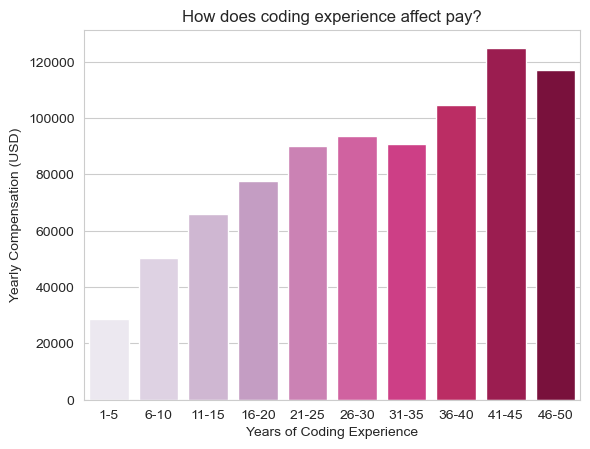

In [115]:
sns.barplot(x=grouped.index, y='ConvertedCompYearly', data=grouped, palette = 'PuRd')
plt.title('How does coding experience affect pay?')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Yearly Compensation (USD)')
plt.show()

#### According to the survey, generally developers with more coding experience get paid more

## 4. What's the most popular method of learning to code?

In [116]:
#print(data['LearnCode'].unique())
print(len(data['LearnCode']))
na_removed = data[~data['LearnCode'].isna()]
print(len(na_removed['LearnCode']))
print(na_removed['LearnCode'].unique())

73268
71580
['Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)'
 'Books / Physical media;School (i.e., University, College, etc)'
 'Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training'
 'Other online resources (e.g., videos, blogs, forum)'
 'Online Courses or Certification' 'On the job training;Coding Bootcamp'
 'Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)'
 'School (i.e., University, College, etc)' 'Books / Physical media'
 'Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Online Courses or Certification;Colleague'
 'Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification'
 'Books / Physical media;School (i.e., Unive

In [117]:
na_removed['Books'] = np.where(na_removed['LearnCode'].str.contains('Books'), 1, np.nan)
na_removed['School'] = np.where(na_removed['LearnCode'].str.contains('School'), 1, np.nan)
na_removed['On the job training'] = np.where(na_removed['LearnCode'].str.contains('On the job training'), 1, np.nan)
na_removed['Other online resources'] = np.where(na_removed['LearnCode'].str.contains('Other online resources'), 1, np.nan)
na_removed['Online Courses or Certification'] = np.where(na_removed['LearnCode'].str.contains('Online Courses or Certification'), 1, np.nan)
na_removed['Coding Bootcamp'] = np.where(na_removed['LearnCode'].str.contains('Coding Bootcamp'), 1, np.nan)
na_removed['Friend or family member'] = np.where(na_removed['LearnCode'].str.contains('Friend or family member'), 1, np.nan)
na_removed['Other'] = np.where(na_removed['LearnCode'].str.contains('please specify'), 1, np.nan)

na_removed[['Books', 'School', 'On the job training', 'Other online resources', \
                  'Online Courses or Certification', 'Coding Bootcamp', 'Friend or family member', 'Other']]

,Books,School,On the job training,Other online resources,Online Courses or Certification,Coding Bootcamp,Friend or family member,Other
2,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
73263,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
73264,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
73265,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
73266,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'What is the most popular method of learning to code?')

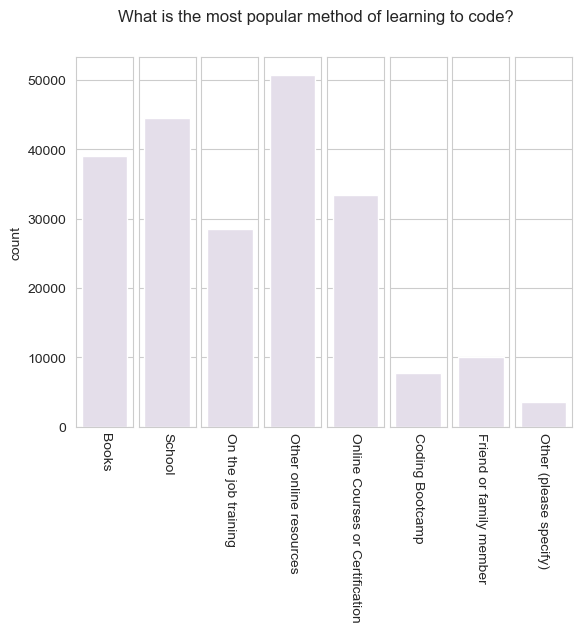

In [118]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=1, ncols=8, sharey=True)
fig.suptitle('')
sns.countplot(x='Books', data=na_removed, ax=ax1)
sns.countplot(x='School', data=na_removed, ax=ax2)
sns.countplot(x='On the job training', data=na_removed, ax=ax3)
sns.countplot(x='Other online resources', data=na_removed, ax=ax4)
sns.countplot(x='Online Courses or Certification', data=na_removed, ax=ax5)
sns.countplot(x='Coding Bootcamp', data=na_removed, ax=ax6)
sns.countplot(x='Friend or family member', data=na_removed, ax=ax7)
sns.countplot(x='Other', data=na_removed, ax=ax8)

plt.subplots_adjust(wspace=0.1)

for ax in fig.get_axes():
    ax.label_outer()

ax1.set_xlabel('Books', rotation = 270)
ax2.set_xlabel('School', rotation = 270)
ax3.set_xlabel('On the job training', rotation = 270)
ax4.set_xlabel('Other online resources', rotation = 270)
ax5.set_xlabel('Online Courses or Certification', rotation = 270)
ax6.set_xlabel('Coding Bootcamp', rotation = 270)
ax7.set_xlabel('Friend or family member', rotation = 270)
ax8.set_xlabel('Other (please specify)', rotation = 270)

for ax in fig.get_axes():
    ax.set_xticks([])

fig.suptitle('What is the most popular method of learning to code?')

#### The most popular method of learning to code amongst respondents in the survey was through other online resources, involving videos, blogs, and forums. 50000 respondents included this method amongst the methods they used to learn coding.

## 5. Are you more likely to get a job as a developer if you have a master's degree?

In [120]:
print(data['MainBranch'].unique())

['None of these' 'I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I code primarily as a hobby' 'I am learning to code'
 'I used to be a developer by profession, but no longer am']


In [121]:
print(data['Employment'].unique())

[nan 'Employed, full-time' 'Student, full-time' 'Student, part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Student, part-time;Employed, part-time'
 'Not employed, and not looking for work'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Independent contractor, freelancer, or self-employed'
 'Retired' 'Student, full-time;Not employed, but looking for work'
 'I prefer not to say'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Not employed, and not looking for work'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time;Independent contractor, freelancer, or self-employed'
 'Independent contractor, freelancer, or s

In [122]:
developer = data[data['MainBranch'].str.contains('profession')]
print(developer)

       ResponseId                                         MainBranch  \
1               2                     I am a developer by profession   
3               4                     I am a developer by profession   
4               5                     I am a developer by profession   
7               8                     I am a developer by profession   
8               9                     I am a developer by profession   
...           ...                                                ...   
73261       73262                     I am a developer by profession   
73263       73264                     I am a developer by profession   
73264       73265                     I am a developer by profession   
73266       73267                     I am a developer by profession   
73267       73268  I used to be a developer by profession, but no...   

                                              Employment  \
1                                    Employed, full-time   
3              

In [123]:
developer['employed_dev'] = np.where(developer['Employment'].str.contains('Employed'), 1, 0)

In [124]:
print(developer['EdLevel'].unique())

[nan 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Something else' 'Associate degree (A.A., A.S., etc.)'
 'Professional degree (JD, MD, etc.)' 'Primary/elementary school'
 'Other doctoral degree (Ph.D., Ed.D., etc.)']


In [125]:
print(developer.groupby('EdLevel').agg({'employed_dev':'mean'}).sort_values(by='employed_dev', ascending=False)*100)

                                                    employed_dev
EdLevel                                                         
Bachelor’s degree (B.A., B.S., B.Eng., etc.)           87.917177
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        87.507562
Other doctoral degree (Ph.D., Ed.D., etc.)             86.642599
Associate degree (A.A., A.S., etc.)                    85.795779
Professional degree (JD, MD, etc.)                     82.603816
Some college/university study without earning a...     79.808964
Something else                                         72.140762
Secondary school (e.g. American high school, Ge...     71.900585
Primary/elementary school                              70.823529


#### Out of all the respondents that have a masters degree, 87.5% of them are employed. However out of individuals who have a bachelors degree as their highest qualification, 87.9% are employed, slighlty tipping those with a masters degree. 